In [21]:
from pre_processing import Pre_Process
from LDA import LDA,GensimLDA
import pyLDAvis.gensim_models

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [22]:
QA=Pre_Process('../business_text_mining/crawl_result/wineQ&A_text.json').clean_data()

In [42]:
D=Pre_Process().Check_date(QA)
print('VAR',D.var())
import chart_studio.plotly.plotly as py
import cufflinks as cf
cf.go_offline(connected=True)
layout1 = cf.Layout(
    height=500,
    width=1000
)
D.iplot(kind='bar',colors='Red',layout=layout1)

VAR 45.29108991422661


컨텐츠의 최대 길이 : 2011
컨텐츠의 평균 길이 : 162.82191590086327


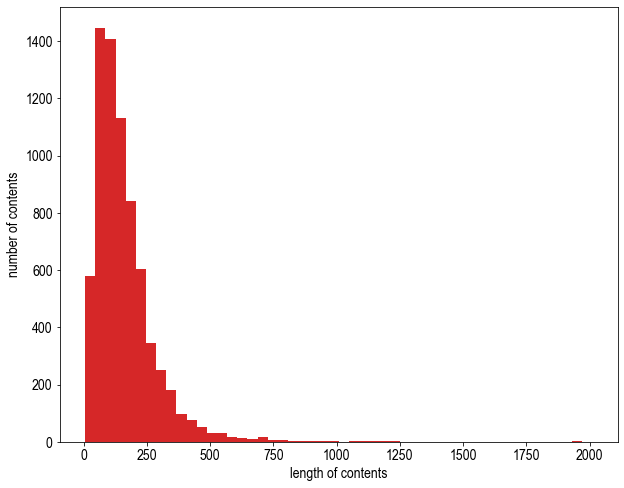

In [29]:
Pre_Process().show_contents_length(QA)

In [30]:
QA=Pre_Process().Get_unique_nouns(QA)

training was done. used memory 1.065 Gbry 1.059 Gb
all cohesion probabilities was computed. # words = 59465
all branching entropies was computed # words = 39925
all accessor variety was computed # words = 39925


100%|██████████| 7182/7182 [00:04<00:00, 1644.37it/s]


,0,1
90,없다,1378
461,싸다,1207
134,가격,1106
93,괜찮다,1042
239,추천,1026
...,...,...
438,공기,29
2350,트레이더스,29
3206,교환,29
1873,제일,29


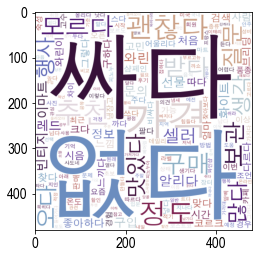

In [31]:
Pre_Process().Get_Nouns_Freq(QA,600,True)

In [32]:
import re
def get_text_with_word(word):
    l=re.findall('(ㅠㅠ)',word)
    L=re.findall('(ㅜㅜ)',word)
    i=re.findall('(\?\?)',word)
    return len(l)+len(i)+len(L)

In [33]:
QA['pain']=QA.contents.apply(lambda x :'pain' if get_text_with_word(x) != 0 else '')
PAIN=QA[QA.pain!='']

In [34]:
PAIN=QA[QA.pain!='']

# LDA

In [35]:
Topic=LDA(QA,3)

Topic 0
추천,화이트,레드,어울리다,샴페인,와린이,품종,셀러,보관,맛있다,좋아하다,숙성,냉장고,온도,종류,넣다,없다,생각,코스트코,말벡
Topic 1
코르크,처음,브리딩,따다,시음,정도,시간,없다,오픈,이상,느낌,보관,맞다,느끼다,넘다,상태,이렇다,질문,적기,오다
Topic 2
가격,싸다,괜찮다,받다,행사,구매,선물,없다,빈티지,이마트,문의,정보,구하다,팔다,검색,알리다,모르다,구입,사람,찾다


In [36]:
def drop_certain_words(corpus, sparse_matrix, drop_words):
    drop_words_index = [np.where(corpus == word)[0][0] for word in drop_words]
    to_keep = sorted(set(range(sparse_matrix.shape[1])) - set(drop_words_index))
    corpus = corpus[to_keep]
    sparse_matrix = sparse_matrix[:, to_keep]
    return corpus, sparse_matrix

In [37]:
def closer_look(df, topic_num, content, limit=40):
    each_topic_df = df[df['topic label'] == topic_num]
    print(each_topic_df[['topic prob', '제목', '본문', '댓글']].sort_values(by='topic prob', ascending=False)[content][:limit])

# gensim

In [38]:
vis=GensimLDA(QA,10)
pyLDAvis.display(vis)